In [1]:
import os
import pandas as pd
import psycopg2
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt
import getpass

In [2]:
pw=getpass.getpass() 
conn = psycopg2.connect("dbname='EmployeeSQL' user='postgres' host='localhost' port='5432' password='{}'".format(pw))


········


In [17]:
#Create a histogram to visualize the most common salary ranges for employees.

cur = conn.cursor()
cur.execute('''select * from vw_emp_salary''')
tupples = cur.fetchall()
col_names = [i[0] for i in cur.description]
cur.close()

# Extract the column names from cursor description
col_names = []
for name in cur.description:
    col_names.append(name[0])

# Create the dataframe, passing in the above values
salaries_df = pd.DataFrame(tupples, columns=col_names)


salaries_df.head()
# salaries_df.count()

,emp_no,last_name,first_name,sex,salary
0,57444,Babb,Berry,F,48973
1,13616,Lorho,Perry,F,40000
2,240129,Karnin,Roddy,M,43548
3,427958,Poujol,Feixiong,F,63377
4,35916,Talmon,Wonhee,F,40000


In [16]:
#check for null values 
# salaries_df.count() 
# salaries_df.isnull().sum()

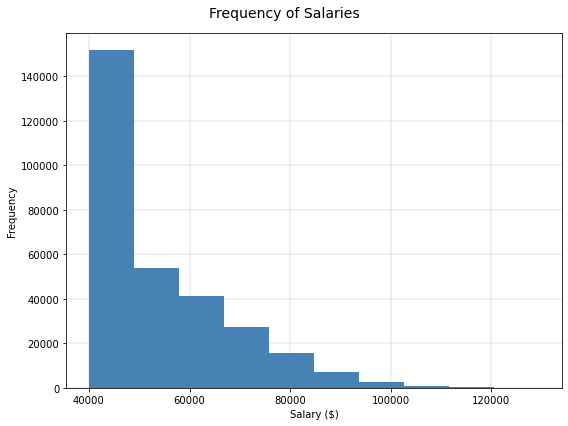

In [18]:
# Plot data
salaries_df.index.names = ['']
fig, ax1 = plt.subplots(figsize=(8, 6))
fig.suptitle("Frequency of Salaries", fontsize=14)
salaries_df['salary'].plot(kind='hist', color='steelblue',legend= False)
plt.grid(color='steelblue', linestyle='-', linewidth=0.2)
plt.ylabel('Frequency')
plt.xlabel('Salary ($)')

plt.tight_layout()

In [7]:
#Create a bar chart of average salary by title.
conn = psycopg2.connect("dbname=EmployeeSQL user=postgres host=localhost password=9102 port=5432")

cur = conn.cursor()
cur.execute('''select * from titles''')
tupples = cur.fetchall()
col_names = [i[0] for i in cur.description]
cur.close()

# Extract the column names from cursor description
col_names = []
for elt in cur.description:
    col_names.append(elt[0])

# Create the dataframe, passing above values
titles_df = pd.DataFrame(tupples, columns=col_names)


# titles_df.head()

In [8]:
#merge tables employee and title 

conn = psycopg2.connect("dbname=EmployeeSQL user=postgres host=localhost password=9102 port=5432")

cur = conn.cursor()
cur.execute('''select * from employees''')
tupples = cur.fetchall()
col_names = [i[0] for i in cur.description]
cur.close()

# Extract the column column names from cursor description
col_names = []
for elt in cur.description:
    col_names.append(elt[0])

# Create the dataframe, passing in the above values
employees_df = pd.DataFrame(tupples, columns=col_names)


employees_df = employees_df.rename(columns={"emp_title_id": "title_id"})
# employees_df.head()

In [21]:
title_employee = pd.merge(titles_df, employees_df, on="title_id")
# title_employee.head()

In [19]:
#check for null values 
# title_employee.isnull().sum()

In [11]:
#new employee_title  with  with salary
salary_employee = pd.merge(title_employee, salaries_df, on="emp_no")
salary_employee.head()

,title_id,title,emp_no,birth_date,first_name_x,last_name_x,sex_x,hire_date,last_name_y,first_name_y,sex_y,salary
0,s0001,Staff,473302,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Zallocco,Hideyuki,M,40000
1,s0001,Staff,421786,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Verhoeff,Xiong,M,40000
2,s0001,Staff,273487,1957-04-14,Christoph,Parfitt,M,1991-06-28,Parfitt,Christoph,M,56087
3,s0001,Staff,246449,1958-03-23,Subbu,Bultermann,F,1988-03-25,Bultermann,Subbu,F,87084
4,s0001,Staff,48085,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Gilg,Venkatesan,M,63016


In [22]:
#check for null values 
# salary_employee.isnull().sum()

In [14]:
salary_employee = salary_employee.loc[:, ['title','salary']]
mean_salaries = salary_employee.groupby(['title']).mean()
mean_salaries

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


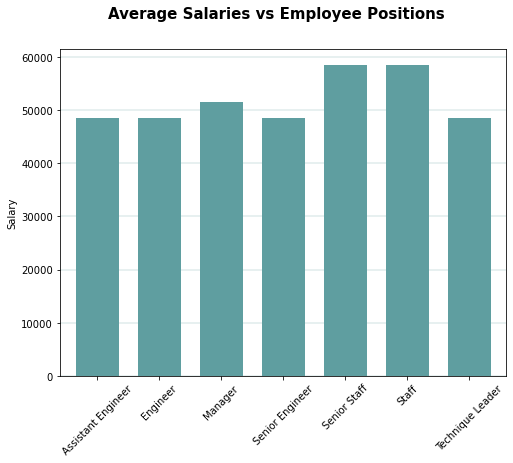

In [15]:
# Plot data
mean_salaries.index.names = ['']
fig, ax1 = plt.subplots(figsize=(8, 6))
fig.suptitle("Average Salaries vs Employee Positions", fontsize=15,fontweight="bold")
mean_salaries['salary'].plot(kind='bar',width=0.7, color='cadetblue',legend= False,)
# plt.grid(color='steelblue', linestyle='-', linewidth=0.2)
ax1.yaxis.grid(color='cadetblue', linestyle='-', linewidth=0.3)
plt.ylabel('Salary')
plt.xticks(rotation=45);